# Discovery of Frequent Itemsets and Association Rules

Date: *17.11.2021.*<br>
Authors: *[Ivan Klabucar, klabucar@kth.se]* *[Simon Langrieger, simlan@kth.se]*<br>

## 1.  Introduction

The goal of this assignment was to develop an algorithmic way to find all frequent itemsets that appear in a given dataset, frequency in this case being defined as some arbitrary threshold. We did this by implementing the A-Priori algorithm and testing our implementation on the provided sale transaction dataset.

The main challenge of this task is the combinatory explosion of the number of all possible itemsets as the number of all items is very large. In the real world this equates to the number of products a retailer sells. In addition to this, sale transaction datasets include information about a huge number of transactions making even a single pass through the data computationally expensive.

## 2.  Class FrequentItemsetFinder

This class contains the implementation of the A-priori algorithm and in this section we will give a brief overview of its important methods and variables:

* Constructor(dataset, s) -> takes a reference to the dataset and the numeric threshold of the desired support expresed in terms of the fraction of the data set size. The dataset should be organized as a list containing iterables that represent baskets.

* self.freq_itemsets is a member variable that points to a dictionary with integer keys. Each key k points to a set of all frequent itemsets of size k. Each itemset is represented as a tuple sorted in ascending order of size k.

* find_freq_items() -> a method that generates the corresponding set for self.freq_itemsets[1]

* find_k_itemsets(k) -> a method that generates the corresponding set for self.freq_itemsets[k]

* only_freq_itemsets(candidates) -> a method that given a set of candidate itemsets returns only those which actually are frequent 

* generate_candidates(k) -> a method that generates candidate itemsets of size k that have a chance at being frequent

* check_if_viable_combination(itemset, item) -> a method that checks whether adding a particular item to a frequent itemset results in a itemset which all subsets are frequent

* find_all_frequent_itemsets() -> a wrapper method the calls find_k_itemsets(k) for increasingly larger values of k until there are no more frequent itemsets to be discovered. It also prints information about the execution time.

## 3.  Running the code

To run the code simply open this python notebook in jupyter.

For example:

`> jupyter notebook`

and then open the notebook in the application that opens and proceed to run all the cells. The algorithm can take quite a while.

## 4.  Finding frequent itemsets in the dataset

The code below will find all frequent itemsets that reach a certain threshold of support. We will run the algorithm multiple times for different values of s (the support threshold) to see the differences in the found itemsets and the time of execution. We expect that the algorithm will take longer for lower support thresholds because more of the itemsets will qualify as frequent. 

We also suspect that the part of the algorithm which will take up the biggest chunk of execution time will be validation of itemsets of size 2. The reason for this is the relatively large number of single frequent items which will then result in a squared number of possible candidates of the 2-itemsets. In the later steps of the algorithm, even though larger itemsets have more possible combinations, their validation will take much less time. This is because the nature of the data is such that it is very unlikey to find large frequent itemsets for reasonable values of the support threshold. Therefore, there won't be many candidates generated for the larger k-itemsets.

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
from Finders import FrequentItemsetFinder, AssociationRulesFinder
import matplotlib.pyplot as plt


SUPPORT THRESHOLD s=0.01
[FIFinder]: Found frequent 1-itemsets in 0.5210621356964111s of size 375.
[FIFinder]: Found frequent 2-itemsets in 612.2751519680023s of size 9.
[FIFinder]: Found frequent 3-itemsets in 1.388582706451416s of size 1.
[FIFinder]: Found frequent 4-itemsets in 0.2059919834136963s of size 0.
[FIFinder]: Found all frequent itemsets with support threshold 0.01% in 614.3907887935638s.

FREQUENT ITEMSETS OF SIZE 1, s=0.01
    ('534',)
    ('523',)
    ('871',)
    ('788',)
    ('937',)
    ('893',)
    ('236',)
    ('162',)
    ('704',)
    ('283',)
    ('563',)
    ('571',)
    ('843',)
    ('38',)
    ('932',)
    ('378',)
    ('795',)
    ('104',)
    ('834',)
    ('914',)
    ('810',)
    ('752',)
    ('326',)
    ('129',)
    ('71',)
    ('405',)
    ('259',)
    ('419',)
    ('758',)
    ('988',)
    ('618',)
    ('116',)
    ('309',)
    ('829',)
    ('522',)
    ('392',)
    ('69',)
    ('496',)
    ('899',)
    ('765',)
    ('665',)
    ('597',)
    ('122',)
 

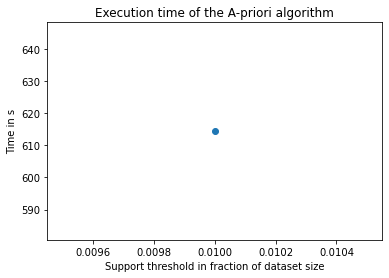

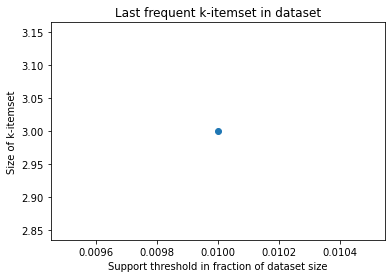

In [31]:
baskets = None
with open('T10I4D100K.dat', 'r') as f:
    baskets = [set(l.split()) for l in f.readlines()]

execution_time = []
last_k_found = []
#possible_thres = [0.05, 0.07, 0.09] # Joke values
possible_thres = [0.01]#[0.02, 0.01, 0.006] # -> Real values we should use but this takes like an hour to execute so haven't done it yet
finders = dict()                                     # -> There is the result of the execution with s=0.01 in file run1.txt in this direcotry
for s in possible_thres:
    print()
    print(f'SUPPORT THRESHOLD s={s}')
    finder = FrequentItemsetFinder(baskets, s)
    last_k, time = finder.find_all_frequent_itemsets()
    last_k_found.append(last_k)
    execution_time.append(time)
    for i in range(len(finder.freq_itemsets)):
        k = i + 1
        print(f'\nFREQUENT ITEMSETS OF SIZE {k}, s={s}')
        for itset in finder.freq_itemsets[k]:
            print(f'    {itset}')
        print()
    finders[s] = finder
    
plt.figure(1)
plt.title('Execution time of the A-priori algorithm')
plt.plot(possible_thres, execution_time, marker='o')
plt.ylabel('Time in s')
plt.xlabel('Support threshold in fraction of dataset size')

plt.figure(2)
plt.title('Last frequent k-itemset in dataset')
plt.plot(possible_thres, last_k_found, marker='o')
plt.ylabel('Size of k-itemset')
plt.xlabel('Support threshold in fraction of dataset size')

plt.show()

# 5. Finding Association Rules (Bonus)

In this part, we use the frequent itemsets from 4. to mine for association rules. 

For this we use the simple variant to calculate the confidence of a rule A -> I \ A which is supp(I) / supp(A) for every subset A in I for all frequent itemsets A.

In [36]:
freq_itemsets = finders[0.01].getFreqItemsetsWithSupport()

In [37]:
c = 0.75
rule_finder = AssociationRulesFinder(freq_itemsets)
for rule in rule_finder.getAssociationRules(c):
    print(f"{rule[0]} -> {rule[1]}")

{'39', '704'} -> {'825'}
{'39', '825'} -> {'704'}
{'704', '825'} -> {'39'}
